## Generators Concept
- category1 : store all products and sell to customers(shop size large)
- category2 : they'll sell to customers on order(only one table)

### Normal Collection vs Generators  wrt memory utilization

In [1]:
l = [x*x for x in range(100)]     #all these 100 values are stored in memory
print(l[0])

0


In [2]:
#l = [x*x for x in range(10000000000)]             
#print(l[0])                                     # memory error

In above cell in the line one will get memory error beacuse when we execute it will create all objects and store in the memory at a time. to overcome it we introduce the generator concept

In [3]:
#tuple comprehension
l2 = (x*x for x in range(10))
print(type(l2))
print(next(l2))

<class 'generator'>
0


In [4]:
g = (x*x for x in range(100000000000000000))
print(next(g))
print(next(g))
print(next(g))
#for i in g:
    #print(i)

0
1
4


### diff b/w collections and generators
- collections the values are always going to stored in the memory .
- if you want to generate big sequence of values then go for generator
  in case of generator values never going to store in memory

## Generators?
- it is a function which is responsible to generate a sequence of values(it is a funtion that returns an object which can iterate over as one value at a time)
- we can write generator function just like ordinary functions but it uses yield keyword to return values
- if a function contain atleast one yield statement it becomes a generator function

### Why generators
- to handle large volumes of data
- for memory utiliztion

### diff b/w return and yield
- return statement will terminate the entire function
- yield pauses the function and saving all its states and later continues from there on successive calls 

### NOTE: generator function won't take any argument and by using "yield" keyword we can generate the values

In [5]:
def gen():
    yield 'A'
    yield 'B'
    yield 'C'

g=gen()
print(next(g))
print(next(g))
print(next(g))
#print(next(g))   #StopIteration: 

A
B
C


In [3]:
def gen():  
    for i in range(10):  
        if(i%2==0):  
             yield i  
  
### Successive Function call using for loop  
# for i in gen():  
#     print(i) 

g = gen()
print(next(g))
print(next(g))

0
2


#### 2.generate first n numbers

In [6]:
def firstn(num):
    n=1
    while n<=num:
        yield n
        n=n+1
                
print(type(firstn))
f = firstn(5)
for i in f:
    print(i)

<class 'function'>
1
2
3
4
5


In [7]:
values = firstn(10)
list(values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [8]:
def countdown(num):
    while num>0:
        yield num
        num=num-1
        
for c in countdown(5):
    print(c)

5
4
3
2
1


#### yield vs. return
The yield statement is responsible for controlling the flow of the generator function. It pauses the function execution by saving all states and yielded to the caller. Later it resumes execution when a successive function is called. We can use the multiple yield statement in the generator function.

The return statement returns a value and terminates the whole function and only one return statement can be used in the function.

#### Difference between Generator function and Normal function
- Normal function contains only one Lreturn statement whereas generator function can contain one or more yield statement.
- When the generator functions are called, the normal function is paused immediately and control transferred to the caller.
- Local variable and their states are remembered between successive calls.
- StopIteration exception is raised automatically when the function terminates.

#### 3.To generate Fibonacci numbers 0,1,1,2,3,5,8,13,21 

In [9]:
def fib():
    a,b = 0,1
    while True:
        yield a                #what we have done last time and what we have to genarate next time
        a,b = b,a+b
        
for f in fib():
    if f<100:
        print(f)
    else:
        break

0
1
1
2
3
5
8
13
21
34
55
89


In [10]:
def fibon(n):
    a = 1
    b = 1
    output = []
    
    for i in range(n):
        output.append(a)
        a,b = b,a+b
        
    return output

In [11]:
fibon(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

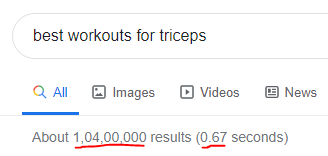

In [12]:
from IPython.display import Image
Image("E:/code/1.PythonOfficial/img/generator1.png") #real time example of Generator

### Advantages
- when compared with class level iterators, generators are very easy to use
- improves memory utilization and performance
- generators are best suitable for reading data from large number of large files 
- generators work great for web scraping and crawling

In [18]:
# from random import *
# #import time

# def namegen():
#     #alpha = 'ABCDEFGHIJKLMNOPQRSTUVXYZ'
#     alpha = 'ABCDEF'
#     while True:
#         name = ''
#         for i in range(6):
#             name  = name+choice(alpha)
#         yield name
    
# for n in namegen():
#     #time.sleep(2)
#     print(n)

#### 4.with respect to performance

In [19]:
# normal concept
from random import *
import time

names=['pawan','kumar','puppala']
tech = ['java','python','dotnet']

def employe_list(num):
    results=[]
    for i in range(num):
        person = {'id':i,
                  'name':choice(names),
                  'techology':choice(tech)}
        results.append(person)
    return results

employe_list(3)

[{'id': 0, 'name': 'puppala', 'techology': 'java'},
 {'id': 1, 'name': 'puppala', 'techology': 'dotnet'},
 {'id': 2, 'name': 'pawan', 'techology': 'python'}]

In [20]:
# Generator concept
from random import *
import time

names=['pawan','kumar','puppala']
tech = ['java','python','dotnet']

def employe_generator(num):
    for i in range(num):
        person = {'id':i,'name':choice(names),'techology':choice(tech)}
    yield person 

gen = employe_generator(3)
for g in gen:
    print(g)

{'id': 2, 'name': 'pawan', 'techology': 'dotnet'}


In [21]:
t1 = time.clock()
emp = employe_list(1000)
t2= time.clock() 
print("time taken",t2-t1)

time taken 0.0074378000000000005


In [22]:
t1 = time.clock()
emp = employe_generator(1000)
t2= time.clock() 
print("time taken",t2-t1)

time taken 0.00026729999999997034


In [23]:
#Ex1: print cude of given numbers
def cube(a):
    for i in range(a):
        print(i**3)

In [24]:
cube(3)

0
1
8


In [25]:
#Ex2: generator function for the cube of numbers
def gencubes(n):
    for num in range(n):
        yield num**3

In [26]:
gencubes(4)

<generator object gencubes at 0x000001BAB1A2EDB0>

In [27]:
a = iter(gencubes(4))
print(next(a))
print(next(a))
print(next(a))
print(next(a))
#print(next(a))

0
1
8
27


## customize range

In [28]:
def cus_range(start, stop, step=1):
    numbers = []
    while start < stop:
        numbers.append(start)
        start += step
    return numbers

In [29]:
def cus_xrange(start, stop, step=1):
    numbers = []
    while start < stop:
        yield start
        start += step

In [30]:
cus_range(0,5)

[0, 1, 2, 3, 4]

In [31]:
cus_xrange(0,5)

<generator object cus_xrange at 0x000001BAB19EE258>